# Stage#01: Data Gathering
# Stage#02: Data Exploration

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('E:\Data Science\SDAIA\ReviewsMobile.csv')
dataset.head()

,marketplace (string),customer_id (string),review_id (string),product_id (string),product_parent (string),product_title (string),product_category (string),star_rating (int32),helpful_votes (int32),total_votes (int32),vine (class label),verified_purchase (class label),review_headline (string),review_body (string),review_date (string)
0,"""US""","""20422322""","""R8MEA6IGAHO0B""","""B00MC4CED8""","""217304173""","""BlackVue DR600GW-PMP""","""Mobile_Electronics""",5,0,0,0�(N),1�(Y),"""Very Happy!""","""As advertised. Everything works perfectly, I'...","""2015-08-31"""
1,"""US""","""40835037""","""R31LOQ8JGLPRLK""","""B00OQMFG1Q""","""137313254""","""GENSSI GSM / GPS Two Way Smart Phone Car Alar...","""Mobile_Electronics""",5,0,1,0�(N),1�(Y),"""five star""","""it's great""","""2015-08-31"""
2,"""US""","""51469641""","""R2Y0MM9YE6OP3P""","""B00QERR5CY""","""82850235""","""iXCC Multi pack Lightning cable""","""Mobile_Electronics""",5,0,0,0�(N),1�(Y),"""great cables""","""These work great and fit my life proof case f...","""2015-08-31"""
3,"""US""","""4332923""","""RRB9C05HDOD4O""","""B00QUFTPV4""","""221169481""","""abcGoodefg� FBI Covert Acoustic Tube Earpiece...","""Mobile_Electronics""",4,0,0,0�(N),1�(Y),"""Work very well but couldn't get used to not h...","""Work very well but couldn't get used to not h...","""2015-08-31"""
4,"""US""","""44855305""","""R26I2RI1GFV8QG""","""B0067XVNTG""","""563475445""","""Generic Car Dashboard Video Camera Vehicle Vi...","""Mobile_Electronics""",2,0,0,0�(N),1�(Y),"""Cameras has battery issues""","""Be careful with these products, I have bought...","""2015-08-31"""


In [4]:
# Pick the relevant columns of interest
columns_of_interest = ['review_body (string)', 'star_rating (int32)']
data = dataset[columns_of_interest]
data.head()

,review_body (string),star_rating (int32)
0,"""As advertised. Everything works perfectly, I'...",5
1,"""it's great""",5
2,"""These work great and fit my life proof case f...",5
3,"""Work very well but couldn't get used to not h...",4
4,"""Be careful with these products, I have bought...",2


In [5]:
# Get the number of samples
print('Total number of datapoints:', data.shape[0])

Total number of datapoints: 1000


In [6]:
#Get the number of class (we will convert this the rating to sentiment in the next stage)
print("Number of classes:", data['star_rating (int32)'].nunique())

Number of classes: 5


In [7]:
#Get the number of samples per class
print("Number of samples per class: \n", data['star_rating (int32)'].value_counts())

Number of samples per class: 
 5    572
1    164
4    128
3     78
2     58
Name: star_rating (int32), dtype: int64


# We can see that the data is imbalanced
#Using some sampling techniques to balance data so the model performs well OR We can use Augmentation Technique

In [8]:
#Get the number of words per sample
print("Number of words per sample: " ,np.mean(data['review_body (string)'].apply(lambda x: len(x.split()))))

Number of words per sample:  34.703


In [9]:
#Get the distribution of number of words per sample
print("Distribution of number of words per sample:")
pd.DataFrame([len(s) for s in data['review_body (string)']]).value_counts()

Distribution of number of words per sample:


11      19
13      16
14      15
6       13
20      13
        ..
282      1
286      1
287      1
292      1
9652     1
Length: 377, dtype: int64

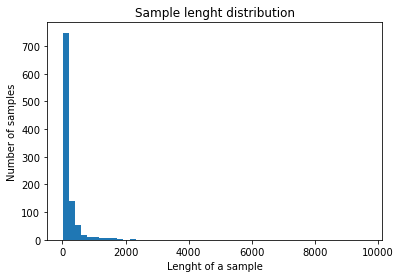

In [10]:
# plot the distribution of sample lenghts
def plot_sample_lenght_distribution(sample_texts):
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Lenght of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample lenght distribution')
    plt.show()
    
plot_sample_lenght_distribution(data['review_body (string)'].tolist())

# Stage# 2.5: Choose a model

In [11]:
#Which model to choose? 
#Model Selection:
#based on data that we have. If we have less data then it's easy to start with the multi layer perceptron or
#even an ML model would be enough to start with
#Incase of we have enough data we don't have any pre-trained model in that domain then we need to build an own model from 
#scratch & that would be a better option 
#Suppose if we have pretrained model the domain that we are dealing with & we have enough data not too much then 
#we can use pretrained model & use transfer learning & then fine-tune the pretrained model & then we can use for that problem

# Stage#3: Prepare the data

In [13]:
#This is needed because the model only understands the numerical data. 
#Data preparation involves two steps:
#1- Feature Engineering
#2- Feature Selection  

In [14]:
# Take a sample of 50% of the dataset for the purpose of demonstration
# So here I have taken only 30% of the total samples that is available on the amazon reviews
data = data.sample(frac=0.3, random_state=42)
data.head()

,review_body (string),star_rating (int32)
521,"""wifi does not stay on i have it mounted out t...",3
737,"""right amount of blue tint, for day and night ...",4
740,"""Not worth the price tag by any means. Get it ...",2
660,"""I purchased this with the idea that I could c...",2
411,"""Came faster then I thought, perfect condition...",5


In [15]:
print("Number of datapoints after sampling:", data.shape)

Number of datapoints after sampling: (300, 2)


In [16]:
# Convert the star rating to sentiments
data['sentiment'] = data['star_rating (int32)'].apply(lambda rating: "positive" if rating >= 3 else "negative")
data.head()

,review_body (string),star_rating (int32),sentiment
521,"""wifi does not stay on i have it mounted out t...",3,positive
737,"""right amount of blue tint, for day and night ...",4,positive
740,"""Not worth the price tag by any means. Get it ...",2,negative
660,"""I purchased this with the idea that I could c...",2,negative
411,"""Came faster then I thought, perfect condition...",5,positive


In [17]:
# One-hot encode the target label
data['sentiment'] = data['sentiment'].map({'positive':1, 'negative':0})
data.head()

,review_body (string),star_rating (int32),sentiment
521,"""wifi does not stay on i have it mounted out t...",3,1
737,"""right amount of blue tint, for day and night ...",4,1
740,"""Not worth the price tag by any means. Get it ...",2,0
660,"""I purchased this with the idea that I could c...",2,0
411,"""Came faster then I thought, perfect condition...",5,1


In [18]:
#Drop the rating column
data.drop(columns=['star_rating (int32)'], inplace=True)
data.head()

,review_body (string),sentiment
521,"""wifi does not stay on i have it mounted out t...",1
737,"""right amount of blue tint, for day and night ...",1
740,"""Not worth the price tag by any means. Get it ...",0
660,"""I purchased this with the idea that I could c...",0
411,"""Came faster then I thought, perfect condition...",1


In [19]:
# Preprocess the reviews
data.rename(columns={'review_body (string)': 'review'}, inplace=True)
#data['review'] = data['review'].str.decode('utf-8')
data['review'] = data["review"].apply(str.lower)
data['review']
data.head()

,review,sentiment
521,"""wifi does not stay on i have it mounted out t...",1
737,"""right amount of blue tint, for day and night ...",1
740,"""not worth the price tag by any means. get it ...",0
660,"""i purchased this with the idea that i could c...",0
411,"""came faster then i thought, perfect condition...",1


In [20]:
# We can see that the data is not balanced
# because we have very high representation of positive class & low representation of negative class
data['sentiment'].value_counts()

1    228
0     72
Name: sentiment, dtype: int64

In [21]:
# For the purpose of demonistration I am taking the same amount of data points in both the classes
positive = data[data['sentiment'] == 1].sample(n=72, random_state=42)
negative = data[data['sentiment'] == 0]
train_data = pd.concat([positive, negative]).sample(frac=1).reset_index(drop=True)
train_data['sentiment'].value_counts()

0    72
1    72
Name: sentiment, dtype: int64

In [22]:
# Sample reviews and it's corresponsding labels
reviews = train_data['review'].tolist() 
labels = train_data['sentiment'].tolist()

print("Sample review:")
print(reviews[10:16])
print("Corresponding labels:")
print(labels[10:16])

Sample review:
['"as described awesome product"', '"stopped working after a month"', '"wow i love this thing. it came a day early on shipping. very nice packaging. it has a soft touch rubber coating which i love the feel of. i tested it with a few different devices and they all connected almost instantly. i put it in the center of my house while i was doing some cleaning and left the phone in my pocket just to test the range, it never lost signal all around my house. its a very loud little speaker as well, perfect for setting up outside when your having a barbecue or something. its comes with a nice little carrying pouch you can put it in for traveling, it also comes with an aux cable and a charging cable. overall one my favorite products i\'ve gotten in a while."', '"sounds ok, but i was having trouble pairing my phone to receive and make calls. when someone called i could hear them but they couldn\'t hear me. the sound quality with the music wasn\'t what i was looking for. i sent thi

In [23]:
# Split the data into train, test and validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=.2, random_state=42)

In [24]:
# Number of train and test data
print("Number of train data points:", len(X_train))
print("Number of train data labels:", len(y_train))
print("Number of test data points:", len(X_test))
print("Number of test labels:", len(y_test))

Number of train data points: 115
Number of train data labels: 115
Number of test data points: 29
Number of test labels: 29


In [25]:
# Load the tokenizer
# Now I am going to tokenize the text by using DistilBertTokenizerFast which is lighter & faster version of BERT Tokenizer 
#& it is already fine-tune on "Standord Sentiment Train bank Dataset" which is for sentiments. 

from transformers import DistilBertTokenizerFast
MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)

In [26]:
# Sample tokenization
print("Sentence:" , X_train[0])
tokenizer(X_train[0], truncation=True, padding=True, max_length=256, return_tensors='tf')

Sentence: "great sound great battery beach, work, park, anywhere battery lasts"


{'input_ids': <tf.Tensor: shape=(1, 17), dtype=int32, numpy=
array([[  101,  1000,  2307,  2614,  2307,  6046,  3509,  1010,  2147,
         1010,  2380,  1010,  5973,  6046, 16180,  1000,   102]])>, 'attention_mask': <tf.Tensor: shape=(1, 17), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])>}

In [27]:
# Perform tokenization

MAX_LENGTH=256
train_encodings = tokenizer(X_train,
                           truncation=True,
                           padding=True,
                           return_tensors='tf',
                           max_length=MAX_LENGTH)
test_encodings = tokenizer(X_test,
                           truncation=True,
                           padding=True,
                           return_tensors='tf',
                           max_length=MAX_LENGTH)

In [28]:
# Convert the tokenizer to TF object
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),
                                                   y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings),
                                                   y_test))

# Stage# 4: Build, train and evaluate the model

In [35]:
from transformers import TFDistilBertForSequenceClassification

model = TFDistilBertForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path=MODEL_NAME,
    num_labels=2
)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [39]:
# Speicify the model optimizer
# Then you define the optimizer it also comes with a lot of parameters like learning rates and other things.
# We will see those hyperparameters in the next session.

optimizer = tf.keras.optimizers.Adam(
    learning_rate=5e-5
)

In [43]:
# Specify the loss function
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [44]:
# Compile the model with three important parameters
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

In [45]:
# Inspect/check the model
model.summary()

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_39 (Dropout)        multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
# Define hyperparameters

BATCH_SIZE = 16
NUM_EPOCHS = 2

model.fit(train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE),
                                epochs=NUM_EPOCHS,
                                batch_size=BATCH_SIZE,
                                validation_data=test_dataset.shuffle(len(X_test)).batch(BATCH_SIZE)
         )

Epoch 1/2
8/8 [==============================] - 45s 4s/step - loss: 0.6554 - accuracy: 0.8087 - val_loss: 0.0754 - val_accuracy: 0.9655
Epoch 2/2
8/8 [==============================] - 37s 5s/step - loss: 0.2059 - accuracy: 0.9304 - val_loss: 0.0457 - val_accuracy: 1.0000


In [50]:
# Save the model
# I am saving model so it can be loaded later for deployment

model.save_pretrained("E:\Data Science\SDAIA\Sentiment Model")

#model.save_pretrained("/tap/sentiment_model")

In [51]:
# Preprocess the unseen data

unseen_data = data.sample(frac=0.05, random_state=42)
unseen_reviews = unseen_data['review'].tolist()

unseen_encodings = tokenizer(unseen_reviews,
                             padding=True,
                             truncation=True,
                             max_length=MAX_LENGTH,
                             return_tensors='tf')

y_unseen = unseen_data['sentiment'].tolist()

unseen_encodings = tf.data.Dataset.from_tensor_slices((dict(unseen_encodings),
                                                       y_unseen
                                                      ))

In [52]:
# Evaluate the model
# It is giving 93% which is actually good that means our model is generalizing well so this is a good sign
# So, I will save this model for deployment
# So, this is with respect to model building & evaluation

model.evaluate(unseen_encodings.shuffle(len(unseen_reviews)).batch(BATCH_SIZE),
              return_dict=True,
              batch_size=BATCH_SIZE)

1/1 [==============================] - 2s 2s/step - loss: 0.3563 - accuracy: 0.8000


{'loss': 0.35626623034477234, 'accuracy': 0.800000011920929}

In [ ]:
#You can look at all these open source libraries

#- Stanford NLP:  https://nlp.stanford.edu/software/
#- NLTK:          https://www.nltk.org/
#- Hugging face:  https://huggingface.co/
#- Spacy:         https://spacy.io/
#- Scikit-learn:  https://scikit-learn.org/


